## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


Suggestion: follow the below plan of action:

* Get familiar with the data
* Select columns of interest
* Decide what to do with NaNs

* Make processing plan
* Develop code that works with a sample

* Adjust the code to work with Big data
* Test big data approach on a sample

* Run program with big data


In [1]:
import pandas as pd

In [2]:
path_to_zips = '../data/Challenge/'
searches_file = path_to_zips + 'searches.csv.bz2'

searches = pd.read_csv(searches_file ,sep='^', nrows = 10000)

In [3]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [4]:
pd.set_option('display.max_columns',None)

In [5]:
searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [6]:
searches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
Date                 10000 non-null object
Time                 10000 non-null object
TxnCode              10000 non-null object
OfficeID             10000 non-null object
Country              10000 non-null object
Origin               10000 non-null object
Destination          10000 non-null object
RoundTrip            10000 non-null int64
NbSegments           10000 non-null int64
Seg1Departure        10000 non-null object
Seg1Arrival          10000 non-null object
Seg1Date             9973 non-null object
Seg1Carrier          4047 non-null object
Seg1BookingCode      1143 non-null object
Seg2Departure        7196 non-null object
Seg2Arrival          7196 non-null object
Seg2Date             7161 non-null object
Seg2Carrier          2870 non-null object
Seg2BookingCode      998 non-null object
Seg3Departure        534 non-null object
Seg3Arrival          534 non-null object
Seg3

In [7]:
searches.dtypes

Date                 object
Time                 object
TxnCode              object
OfficeID             object
Country              object
Origin               object
Destination          object
RoundTrip             int64
NbSegments            int64
Seg1Departure        object
Seg1Arrival          object
Seg1Date             object
Seg1Carrier          object
Seg1BookingCode      object
Seg2Departure        object
Seg2Arrival          object
Seg2Date             object
Seg2Carrier          object
Seg2BookingCode      object
Seg3Departure        object
Seg3Arrival          object
Seg3Date             object
Seg3Carrier          object
Seg3BookingCode      object
Seg4Departure        object
Seg4Arrival          object
Seg4Date             object
Seg4Carrier          object
Seg4BookingCode      object
Seg5Departure        object
Seg5Arrival          object
Seg5Date             object
Seg5Carrier          object
Seg5BookingCode      object
Seg6Departure        object
Seg6Arrival         

## Select the columns of interest

In [8]:
import pandas as pd

searches = pd.read_csv(searches_file, sep='^', usecols=['Date','Destination'],nrows=10000)
searches = searches.dropna()

## Make processing plan


* Filter Mad, Bcn, Agp
* Create YYYY-MM column
* Group by [destination, YYYY-MM]
* Sum
* Plot the results



### filter out the the searches for MAD, BCN, AGP

Take only the rows having MAD, BCN or AGP as destination

In [12]:
my_filter = (searches['Destination']=='MAD')|(searches['Destination']=='BCN')|(searches['Destination']=='AGP')

searches_subset = searches[my_filter]

In [13]:
searches_subset=searches[searches['Destination'].isin(['MAD', 'BCN', 'AGP'])]

In [14]:
searches_subset.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


We need to get the month from the Date column

We cannot use a datetime function on 'date' column as it is string

Options:

* Using string and obtaining yyyy-mm directly from it

* Transforming string to date:      

  * parse_dates=['Date'] - in csv_read function

  * pd.to_datetime  - function

### Option 1) use directly pd.to_datetime()

In [15]:
import pandas as pd

searches = pd.read_csv(searches_file, sep='^', usecols=['Date','Destination'],nrows=10000)
searches = searches.dropna()

searches_subset=searches[searches['Destination'].isin(['MAD', 'BCN', 'AGP'])]
searches_subset['Date'] = pd.to_datetime(searches_subset['Date'], format="%Y-%m-%d")

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [16]:
searches_subset.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [17]:
searches_subset['Date'].iloc[1].month

1

In [18]:
searches_subset['Date'].iloc[1].year

2013

In [19]:
searches_subset['PlotDate'] = searches_subset['Date'].map(lambda x:"%d-%02d"%(x.year, x.month))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
searches_subset.head(5)

,Date,Destination,PlotDate
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


### Option 2) get PlotDate directly from the string

In [21]:
import pandas as pd

searches = pd.read_csv(searches_file, sep='^', usecols=['Date','Destination'],nrows=10000)
searches = searches.dropna()

searches_subset = searches[searches['Destination'].isin(['MAD', 'BCN', 'AGP'])]
searches_subset.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [22]:
searches_subset['PlotDate'] = searches['Date'].str.slice(0,7)
searches_subset.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Date,Destination,PlotDate
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


## group by arr_port search month

In [36]:
import pandas as pd

searches = pd.read_csv(searches_file, sep='^', usecols=['Date','Destination'],nrows=10000)
searches = searches.dropna()

searches_subset = searches[searches['Destination'].isin(['MAD', 'BCN', 'AGP'])]
searches_subset['PlotDate'] = searches['Date'].str.slice(0,7)
searches_subset.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,Date,Destination,PlotDate
4,2013-01-01,MAD,2013-01
93,2013-01-01,AGP,2013-01
113,2013-01-01,BCN,2013-01
147,2013-01-01,AGP,2013-01
151,2013-01-01,MAD,2013-01


In [37]:
arrivals_per_destination = searches_subset.groupby(['PlotDate', 'Destination']).count()

In [38]:
arrivals_per_destination

Date
PlotDate Destination      
2013-01  AGP            48
         BCN           162
         MAD           125

In [39]:
arrivals_per_destination.columns

Index(['Date'], dtype='object')

In [40]:
arrivals_per_destination.columns = ['Searches']

prepared_df = arrivals_per_destination.reset_index()
prepared_df

,PlotDate,Destination,Searches
0,2013-01,AGP,48
1,2013-01,BCN,162
2,2013-01,MAD,125


In [51]:
arrivals_per_destination.reset_index?

In [41]:
prepared_df = arrivals_per_destination.reset_index().pivot('PlotDate','Destination','Searches')

prepared_df

Destination,AGP,BCN,MAD
PlotDate,,,
2013-01,48,162,125


Again.....What do we have?


In [43]:
prepared_df.columns

Index(['AGP', 'BCN', 'MAD'], dtype='object', name='Destination')

In [46]:
prepared_df.index

Index(['2013-01'], dtype='object', name='PlotDate')

## 4.3 Plotting

In [47]:
prepared_df

Destination,AGP,BCN,MAD
PlotDate,,,
2013-01,48,162,125


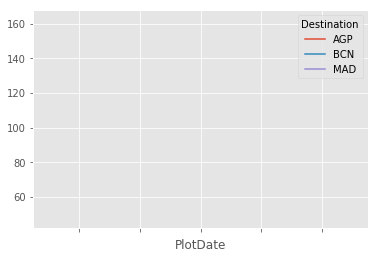

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

prepared_df.plot()

## 5) Adjust the code to work with Big data

In [49]:
#Option 2) get DatePlot directly from the string
#this doesnt raise any error
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline


searches = pd.read_csv(searches_file, sep='^', usecols=['Date','Destination'], chunksize=100000)

dataframes = []

for chunk in searches:
    
    chunk = chunk.dropna()

    searches_subset = chunk[chunk['Destination'].isin(['MAD', 'BCN', 'AGP'])]
    #chunk[chunk['Destination']=='AGP'|chunk['Destination']=='BCN' | chunk['Destination']=='MAD']
    searches_subset['PlotDate'] = searches_subset['Date'].str.slice(0,7)
    
    arrivals_per_destination = searches_subset.groupby(['PlotDate', 'Destination']).count()
    arrivals_per_destination.columns = ['Searches']

    prepared_df = arrivals_per_destination.reset_index()
    dataframes.append(prepared_df)

result = pd.concat(dataframes).groupby(['PlotDate', 'Destination']).sum().reset_index().pivot('PlotDate','Destination','Searches')

result

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Destination,AGP,BCN,MAD
PlotDate,,,
2013-01,9633,29469,24258
2013-02,8379,28329,22800
2013-03,10659,30552,24681
2013-04,8265,31236,25251
2013-05,10830,28728,26334
2013-06,7923,26505,22800
2013-07,8892,29241,22971
2013-08,7866,27075,21831
2013-09,8151,23427,21147


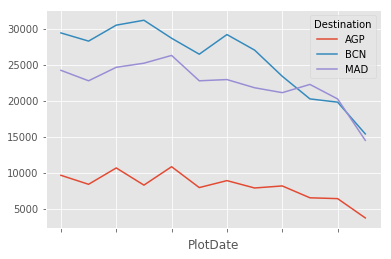

In [50]:
result.plot();